In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../data/processed/cars_clean.csv')
print(df.columns)

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (16, 10)

Index(['car_id', 'price', 'predicted_price', 'car_age', 'engine_volume',
       'cylinders', 'car_run_km', 'safety_feature_count',
       'comfort_feature_count', 'manufacturer', 'model', 'fuel_type',
       'gear_type', 'drive_type', 'color', 'category', 'abs', 'esd',
       'el_windows', 'conditioner', 'leather', 'hydraulics', 'chair_warming',
       'climat_control', 'customs_passed', 'tech_inspection', 'has_turbo',
       'right_wheel', 'start_stop', 'back_camera', 'is_dealer', 'is_spec'],
      dtype='object')


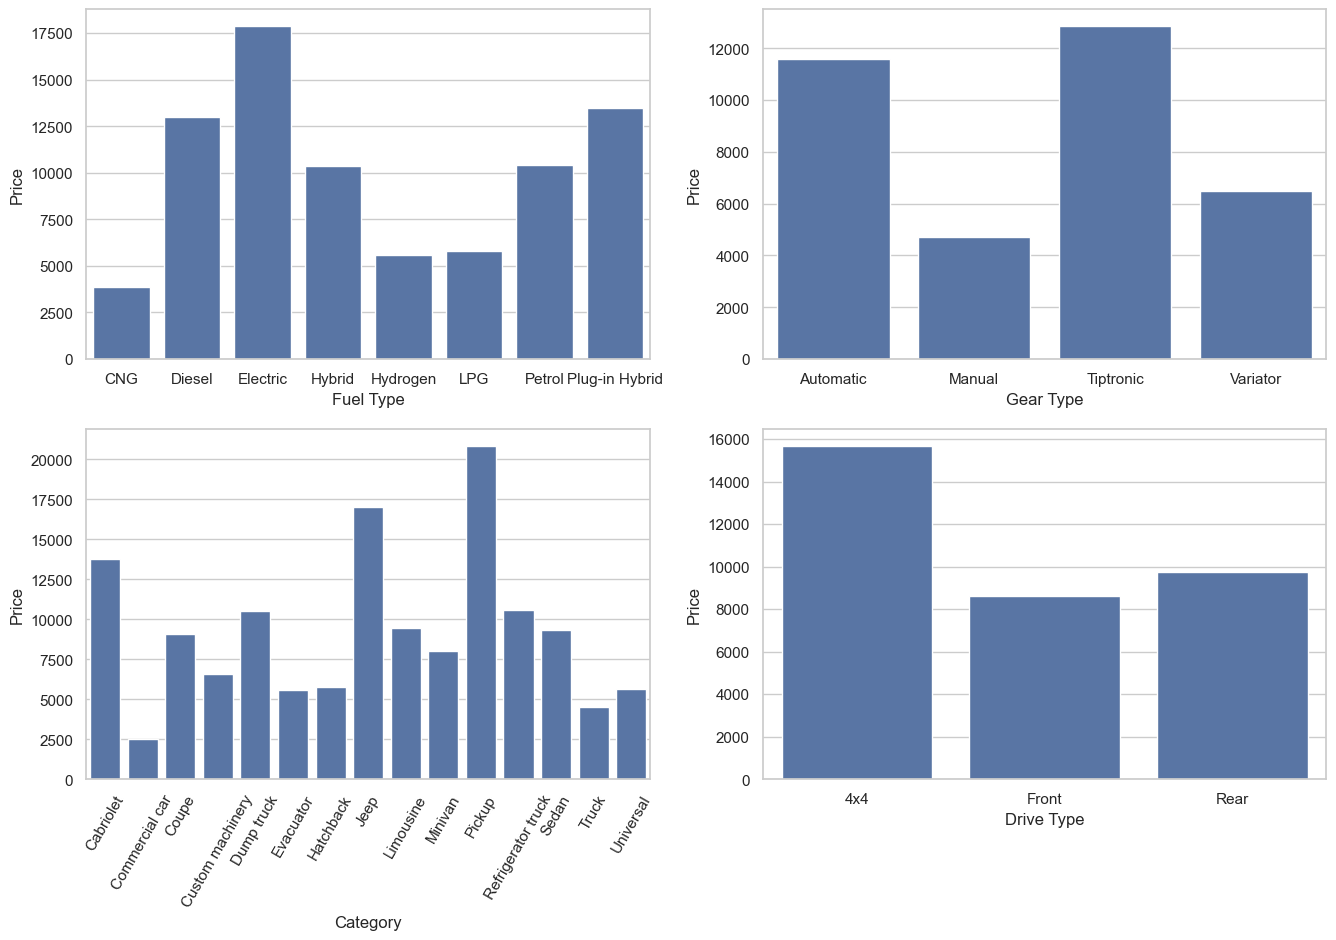

In [19]:
plt.subplot(2, 2, 1)

grouped_by_fuel_type = df.groupby('fuel_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_fuel_type, x='fuel_type', y='price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')

plt.subplot(2, 2, 2)

grouped_by_gear_type = df.groupby('gear_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_gear_type, x='gear_type', y='price')
plt.xlabel('Gear Type')
plt.ylabel('Price')

plt.subplot(2, 2, 3)

grouped_by_category = df.groupby('category')['price'].mean().reset_index()

sns.barplot(data=grouped_by_category, x='category', y='price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=60)

plt.subplot(2, 2, 4)

grouped_by_drive_type = df.groupby('drive_type')['price'].mean().reset_index()

sns.barplot(data=grouped_by_drive_type, x='drive_type', y='price')
plt.xlabel('Drive Type')
plt.ylabel('Price')
plt.show()

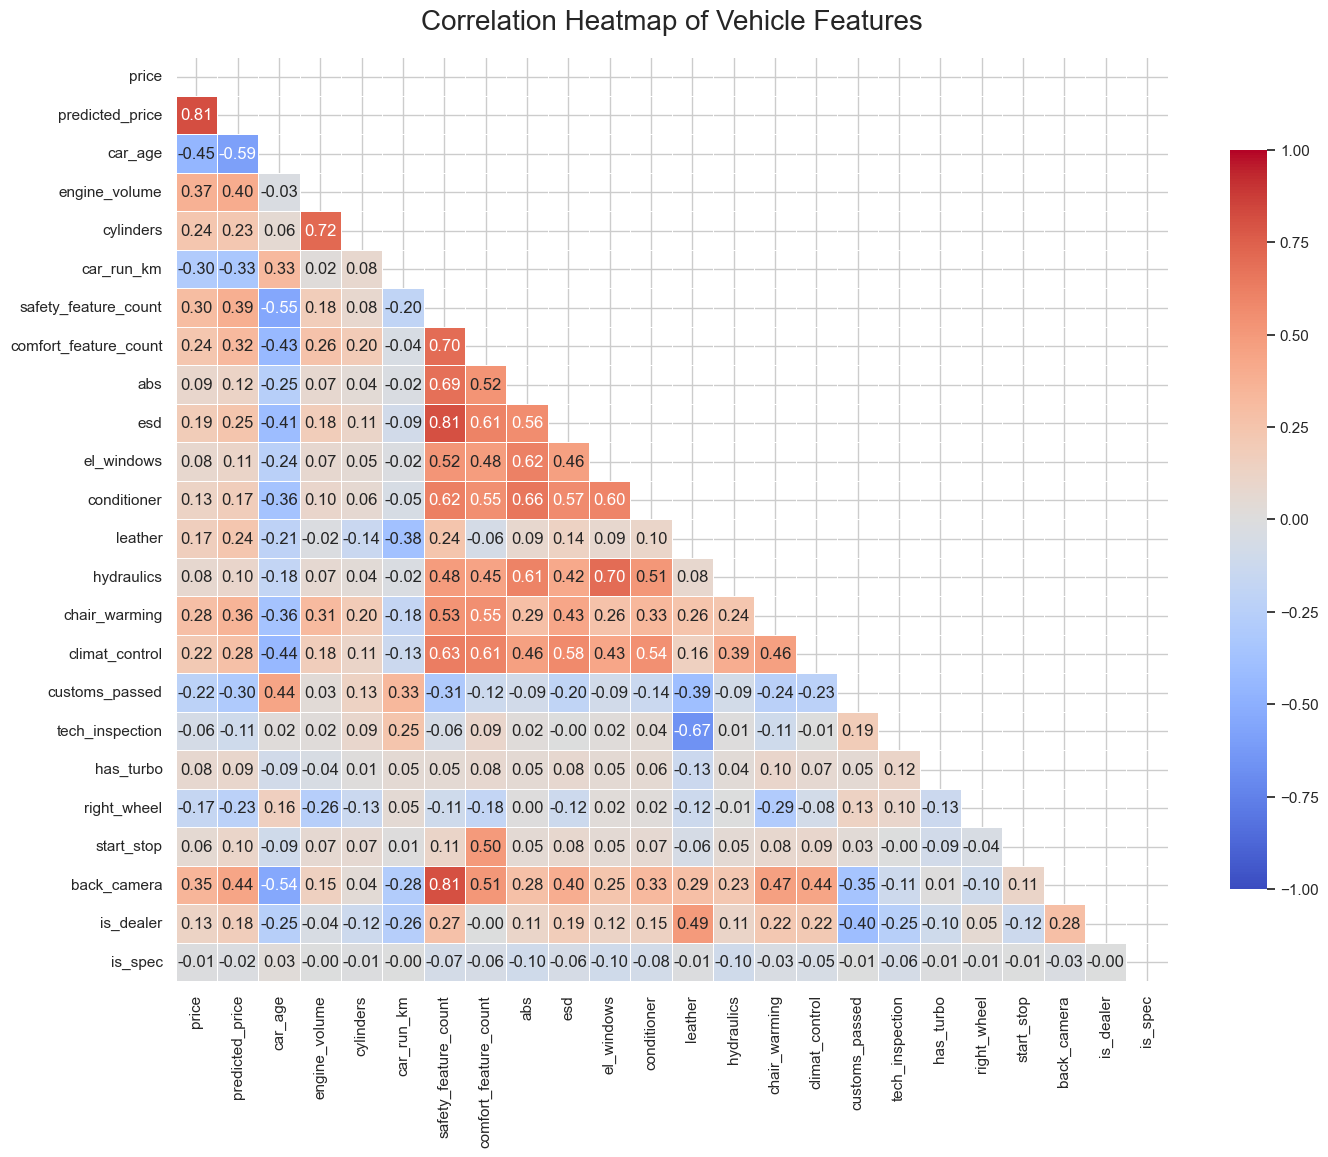

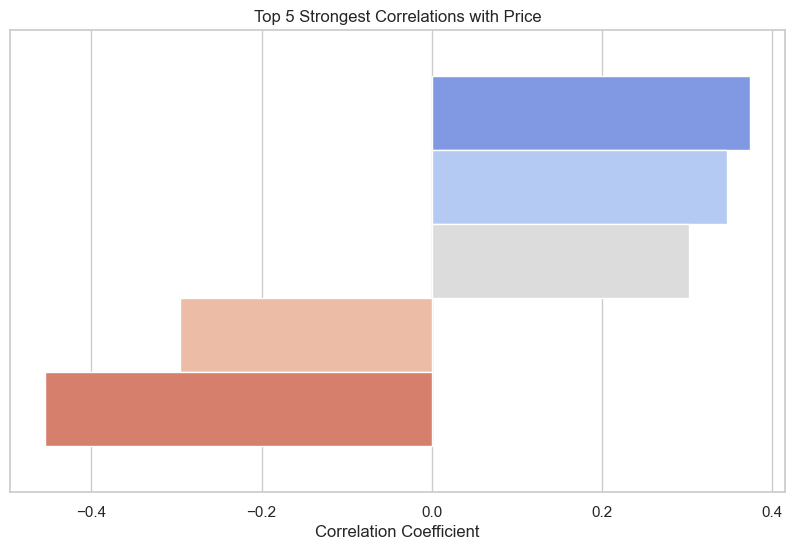

In [26]:
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['car_id'], errors='ignore')
corr_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(16, 12))

heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",            # Round to 2 decimal places
    cmap='coolwarm',      # Red for positive, Blue for negative correlation
    vmin=-1, vmax=1,      # Ensure the scale is always -1 to 1
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Heatmap of Vehicle Features', fontsize=20, pad=20)
plt.show()

correlations = corr_matrix['price']
correlations = correlations.drop(['price', 'predicted_price'])

top_5_features = correlations.abs().sort_values(ascending=False).head(5)
top_5_summary = correlations[top_5_features.index].sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=top_5_summary.values, hue=top_5_summary.index, palette='coolwarm', legend=False)
plt.title('Top 5 Strongest Correlations with Price')
plt.xlabel('Correlation Coefficient')
plt.show()

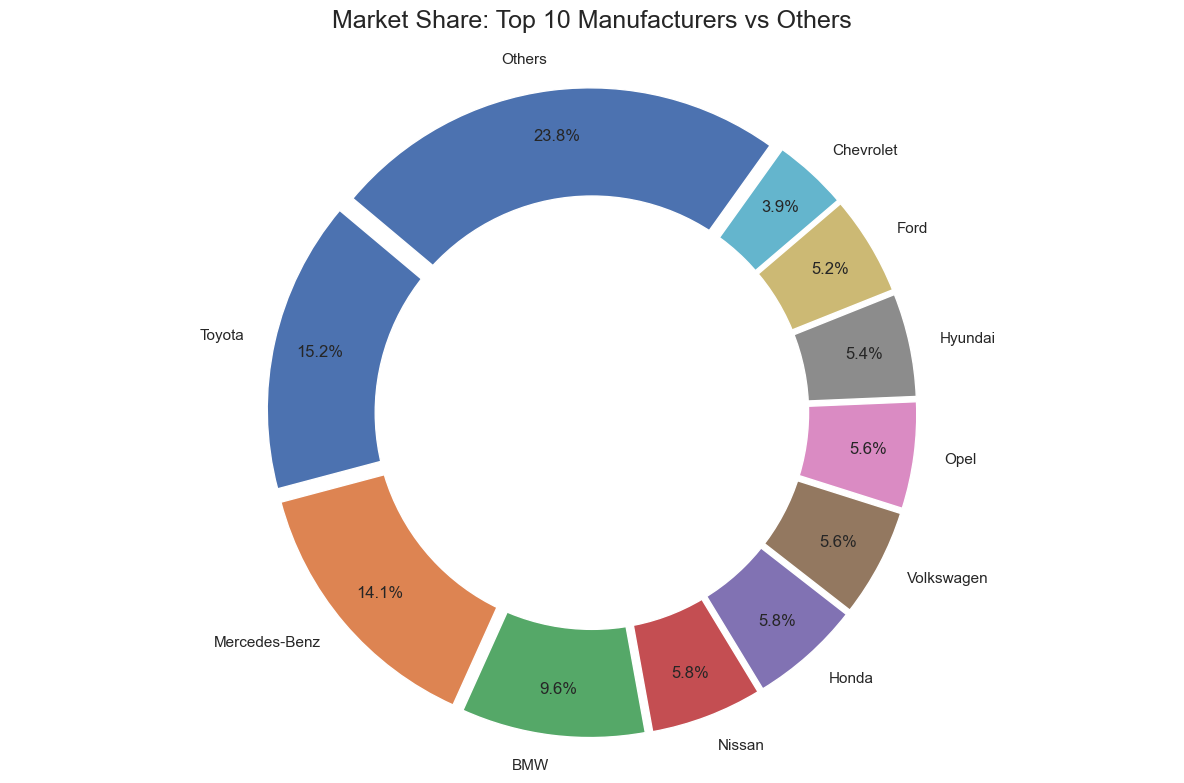

In [30]:
man_counts = df['manufacturer'].value_counts()

# How many top manufacturers to show
top_n = 10
top_man = man_counts.head(top_n)

# Group the rest into 'Others'
others_count = man_counts.iloc[top_n:].sum()
if others_count > 0:
    top_man = pd.concat([top_man, pd.Series({'Others': others_count})])

# Pie/Donut Chart
plt.figure(figsize=(12, 8))

plt.pie(
    top_man,
    labels=top_man.index,
    autopct='%1.1f%%',      # Show percentages
    startangle=140,
    pctdistance=0.85,       # Move percentages further out
    explode=[0.05] * len(top_man) # Slight separation between slices
)

# Turn it into a Donut Chart (add white circle in the center)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title(f'Market Share: Top {top_n} Manufacturers vs Others', fontsize=18, pad=20)
plt.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()